In [1]:
from coffea import hist,  util
import awkward as ak
import numpy as np
import glob as glob
import re
import itertools


import json

from coffea import hist

import pickle
import os
import mplhep as hep


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from coffea.util import load, save

year = 2018
vfp = 'post'
version = 1
path = '/Users/hongjieun/MonoTop/notebook_plotting/check_events/'

Now draw fj1pt
/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplotv63_Allcut_2018/fj1pt_wecr_2018_re3.png


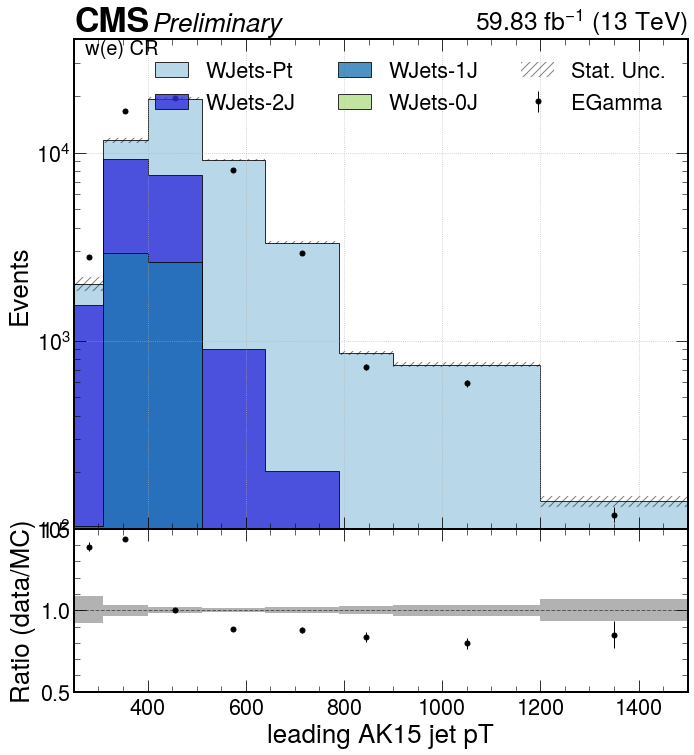

In [13]:
##################
## mc/data ALL CR (Rebin)
##################
from cycler import cycler
from coffea.hist import plot


region = 'wecr'
systematic = 'nominal'

if 'e' in region:
    data = dat[str(year)]['e']
    if 't' in region:
        R = 'tt (e) Control Region'
    if 'w' in region:
        R = 'w(e) CR'
    if 'z' in region:
        R = 'z(ee) CR'
elif 'm' in region:
    data = dat[str(year)]['m']
    if 't' in region:
        R = 'tt(mu) CR'
    if 'w' in region:
        R = 'w(mu) CR'
    if 'z' in region:
        R = 'z(mumu) CR'
else:
    data = dat[str(year)]['g']
    R = 'gamma CR'

for v in bkg_hists.keys():
    if not v == 'fj1pt': continue
    print('Now draw', v)
    if v in exc: continue
    if 'e' in region and 'mu' in v: continue
    if 'm' in region and 'ele' in v: continue
    
    plt.style.use(hep.style.CMS)
    fill_opts = {
        'edgecolor': (0,0,0,0.3), 'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }
    data_fill_opts = {'label': 'Data'}

    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
           '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4','#fb9a99',
          '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.0)
    ax.set_prop_cycle(cycler(color=colors))

    rebin_title = 'leading AK15 jet pT'
    ak15bin = [250, 310, 400, 510, 640, 790, 900, 1200]
    rebkg_hists = bkg_hists[v].rebin(v, hist.Bin('newbin', rebin_title, ak15bin))
    redata_hists = data_hists[v].rebin(v, hist.Bin('newbin', rebin_title, ak15bin))
    plot.plot1d(rebkg_hists.integrate('region', region).integrate('systematic',systematic),
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
           )
    
    plot.plot1d(redata_hists.integrate('region', region).integrate('systematic',systematic),#[data[year][str(j)]],
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            error_opts=data_err_opts
           )
    
    plot.plotratio(redata_hists.integrate('region', region).integrate('systematic',systematic).sum('process'),
               rebkg_hists.integrate('region', region).integrate('systematic',systematic).sum('process'),#.sum('process'),
               ax=rax,
               overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )

    mmm = '''
    plot.plot1d(sig_hists[v].integrate('region', region),
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            stack=False,
            #fill_opts=nostack_fill_opts,
            #error_opts=error_opts
           )
    '''
    
    rax.set_ylabel('Ratio (data/MC)')
    rax.set_ylim(0.0,2.0)
    rax.grid(axis='y')
    if v == 'eT_miss':
        rax.set_xlabel('$E_{T}^{miss}$ [GeV]')
    if v == 'eTphi_miss':
        rax.set_xlabel('$\phi(E_{T}^{miss})$')
    
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_ylim(100, 40000)
    if v == 'fj1pt' or v =='recoil' or v == 'TvsQCD':
        ax.set_ylim(100, 40000)
    
    if v == 'recoil':
        ax.set_xlim(200, 1500)
    rax.set_ylim(0.5,1.5)
    

    leg = ax.legend(ncol=3, loc='best')
    if v == 'nfj':
        ax.set_xlim(0, 10)
        leg = ax.legend(ncol=2, loc='best')
    if v == 'mT':
        ax.set_xlim(0, 1000)
        leg = ax.legend(ncol=2, loc='best')
    
    coffee = plt.text(0., 1., u"☕ "+R, fontsize=20, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
    cutversion = 'Allcut'
    if year == 2016:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)][str(vfp)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplotv'+str(version)+'_'+cutversion+'_'+str(year)+str(vfp))
        plot_name = v+'_'+region+'_'+str(year)+vfp+'VFP.png'
    else:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplotv'+str(version)+'_'+cutversion+'_'+str(year))        
        plot_name = v+'_'+region+'_'+str(year)+'_re3.png'
    
    print(os.path.join(plot_path, plot_name))
    #fig.savefig(os.path.join(plot_path, plot_name))

## Plotting manyplot_2018_Vx file 

In [3]:
rg = 'tw'
version = '60_all'
if year == 2016:
    hists = load(path+'manyplot_'+str(year)+str(vfp)+'VFP_Run'+str(version)+'_'+str(rg)+'.scaled')
    print(path+'manyplot_'+str(year)+str(vfp)+'VFP_Run'+str(version)+'_'+str(rg)+'.scaled')
else:
    hists = load(path+'manyplot_'+str(year)+'_V'+str(version)+'.scaled') #Run all
    #hists = load(path+'manyplot_'+str(year)+'_V'+str(version)+'_'+str(rg)+'.scaled') #Run all
    print(path+'manyplot_'+str(year)+'_V'+str(version)+'_'+str(rg)+'.scaled')
#hists = load('/Users/hongjieun/MonoTop/notebook_plotting/check_events/runALL_2016postVFP_Run2.scaled') #Run all


data_hists = hists['data']
bkg_hists = hists['bkg']
sig_hists = hists['sig']

lumi = {'2018':59.83,
       '2017': 41.48,
       '2016' : {'pre': 19.52,
                'post': 16.81} 
       }

dat = {'2018': {'e': 'EGamma',
                'm': 'MET',
               'g': 'EGamma'},
       '2017': {'e': 'SingleElectron',
               'm': 'MET',
               'g': 'SinglePhoton'},
      '2016': {'e': 'SingleElectron',
              'm': 'MET',
              'g': 'SinglePhoton'}}

eexc = [ 
    'sumw', 'template', 'dr_e_lj','ndcsvM', 'dr_mu_lj','cutflow',    
    'runnumber','ndflvL','ndflvM', 'recoil_wg',
    'recoilphi', 
]
exc = ['phopt', 'sumw', 'template', 'cutflow',
       'genWeight_roi', 'nloewk_roi',
       'elept', 'elephi', 'eleeta', 
       'mupt', 'muphi', 'mueta', 'phophi', 'phoeta', 
       'partWpt', 'partWpt2']

/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplot_2018_V60_all_tw.scaled


In [35]:
bkg_hists.keys()

dict_keys(['sumw', 'mT', 'nfj', 'fj1pt', 'elept', 'mupt', 'muphi', 'mueta', 'phopt', 'template', 'cutflow', 'recoil', 'recoilphi', 'eT_miss', 'eTphi_miss', 'ndflvj', 'ntighte', 'ntightmu', 'ntightpho', 'fj1phi', 'fj1eta', 'elephi', 'eleeta', 'phophi', 'phoeta', 'dphi_fj_recoil', 'dphi_j_met', 'partWpt', 'partWpt2', 'TvsQCD'])

Now draw TvsQCD
/Users/hongjieun/MonoTop/notebook_plotting/check_events/eachCuts/manyplotv60_all_WJet_2018/mcDATA_TvsQCD_wecr_2018.png


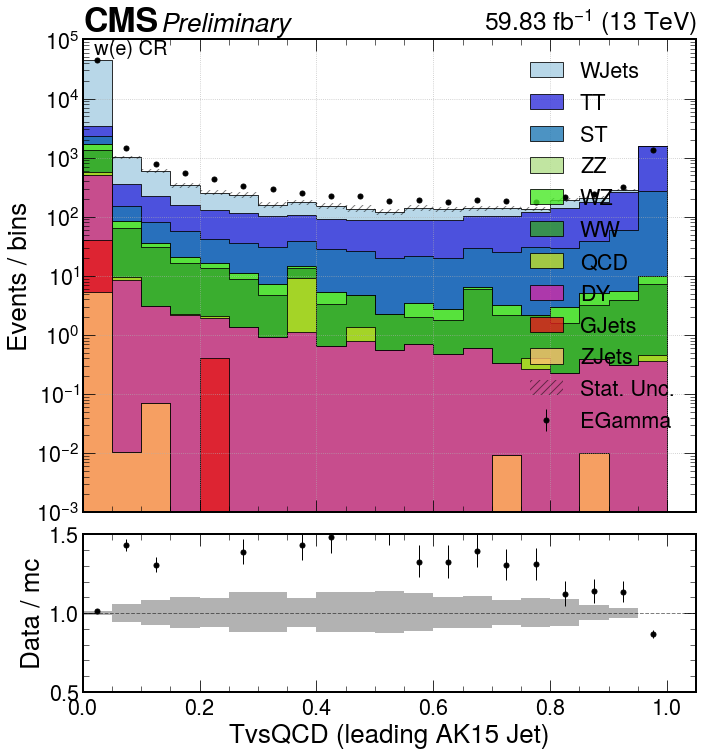

In [7]:
###########
## Main Plotter
##################
## mc, DATA ALL CR
##################
from cycler import cycler
from coffea.hist import plot


region = 'wecr'
systematic = 'nominal'

if 'e' in region:
    data = dat[str(year)]['e']
    if 't' in region:
        R = 'tt (e) Control Region'
    if 'w' in region:
        R = 'w(e) CR'
    if 'z' in region:
        R = 'z(ee) CR'
elif 'm' in region:
    data = dat[str(year)]['m']
    if 't' in region:
        R = 'tt(mu) CR'
    if 'w' in region:
        R = 'w(mu) CR'
    if 'z' in region:
        R = 'z(mumu) CR'
else:
    data = dat[str(year)]['g']
    R = 'gamma CR'
    

for v in bkg_hists.keys():
    #if not v == 'partWpt2': continue
    if not v == 'TvsQCD': continue
    #if v == 'testrecoilphi': continue
    print('Now draw', v)
    if v in exc: continue
    #if 'e' in region and 'mu' in v: continue
    
    #if not v == 'eT_miss': continue
    #plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 
    #                     'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    plt.style.use(hep.style.CMS)
    fill_opts = {
        #'edgecolor': (0,0,0,0.3), 'alpha': 1.0, 'linewidth':2.5
        'edgecolor': (0,0,0,0.3), 'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }
    data_fill_opts = {'label': 'Data'}

    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    newcolors = ['gold','blue','green','lightgreen','lightgreen','lightgreen','maroon','orange','magenta','brown']
    colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
           '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4','#fb9a99',
          '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']
    
    
    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    #rebkg_hists = bkg_hists[v].rebin(v, hist.Bin('newbin', 'gen W pt', 40, 0, 800))

    #plot.plot1d(rebkg_hists.integrate('region', region).integrate('systematic',systematic),
    plot.plot1d(bkg_hists[v].integrate('region', region).integrate('systematic',systematic),
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
           )
    plot.plot1d(data_hists[v].integrate('region', region).integrate('systematic',systematic),#[data[year][str(j)]],
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            error_opts=data_err_opts
           )    
    plot.plotratio(data_hists[v].integrate('region', region).integrate('systematic',systematic).sum('process'),
                bkg_hists[v].integrate('region', region).integrate('systematic',systematic).sum('process'),#.sum('process'),
               ax=rax,
               overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )
    ax.set_xlabel(None)
    ax.set_ylabel('Events / bins')
    rax.set_ylabel('Data / mc')
    ax.grid(True)
    ax.set_yscale('log')
    #ax.set_ylim(1., 100000)
    ax.set_ylim(0.001, 100000)
    rax.set_ylim(0.5,1.5)
#    if v == 'fj1pt' or v =='recoil' or v == 'TvsQCD':
#        ax.set_ylim(0., 10000000)
#    
    if v == 'recoilphi':
        #ax.set_xlim(350, 2000)
        ax.set_ylim(0.1, 50000)
    if v == 'fj1pt':
        ax.set_ylim(0.01,1000000)

    if v == 'eT_miss':
        ax.set_xlabel('$E_{T}^{miss}$ [GeV]')
        ax.set_ylim(0.01, 1000000)
    if v == 'eTphi_miss':
        ax.set_xlabel('$\phi(E_{T}^{miss})$')
        ax.set_ylim(0.01, 100000)
        
    
    leg = ax.legend(ncol=1, loc='upper right')
    if 'n' in v:
        ax.set_xlim(0, 10)
        leg = ax.legend(ncol=2, loc='best')
    if v == 'mT':
        ax.set_xlim(0, 1000)
        leg = ax.legend(ncol=2, loc='best')
    
    #lumi_label = plt.text(1., 1., str(lumi[str(year)])+" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    coffee = plt.text(0., 1., u"☕ "+R, fontsize=20, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
    cutversion = 'WJet'
    if year == 2016:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)][str(vfp)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplotv'+str(version)+'_'+cutversion+'_'+str(year)+str(vfp))
        plot_name = v+'_'+region+'_'+str(year)+vfp+'VFP.png'
    else:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/eachCuts/manyplotv'+str(version)+'_'+cutversion+'_'+str(year))        
        plot_name = 'mcDATA_'+v+'_'+region+'_'+str(year)+'.png'
    
    print(os.path.join(plot_path, plot_name))
    #os.makedirs(os.path.join(plot_path), exist_ok=True)
    #fig.savefig(os.path.join(plot_path, plot_name))

Now draw recoil
/Users/hongjieun/MonoTop/notebook_plotting/check_events/eachCuts/manyplotv60_all_WJet_2018/recoil_wmcr_2018.png


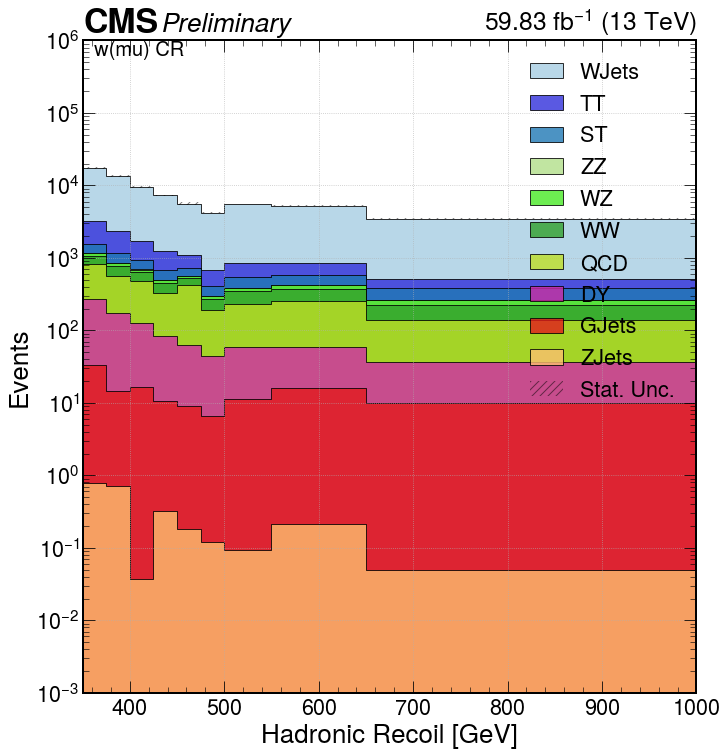

In [20]:
##################
## mc ALL CR
##################
from cycler import cycler
from coffea.hist import plot


region = 'wmcr'
systematic = 'nominal'

if 'e' in region:
    data = dat[str(year)]['e']
    if 't' in region:
        R = 'tt (e) Control Region'
    if 'w' in region:
        R = 'w(e) CR'
    if 'z' in region:
        R = 'z(ee) CR'
elif 'm' in region:
    data = dat[str(year)]['m']
    if 't' in region:
        R = 'tt(mu) CR'
    if 'w' in region:
        R = 'w(mu) CR'
    if 'z' in region:
        R = 'z(mumu) CR'
else:
    data = dat[str(year)]['g']
    R = 'gamma CR'
    

for v in bkg_hists.keys():
    #if not v == 'partWpt2': continue
    if not v == 'recoil': continue
    if v == 'testrecoilphi': continue
    print('Now draw', v)
    if v in exc: continue
    #if 'e' in region and 'mu' in v: continue
    
    #if not v == 'eT_miss': continue
    #plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 
    #                     'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    plt.style.use(hep.style.CMS)
    fill_opts = {
        'edgecolor': (0,0,0,0.3), 'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }
    data_fill_opts = {'label': 'Data'}

    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
           '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4','#fb9a99',
          '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']
    fig, ax = plt.subplots(1, 1, figsize=(11,12), sharex=True)
    ax.set_prop_cycle(cycler(color=colors))

    #rebkg_hists = bkg_hists[v].rebin(v, hist.Bin('newbin', 'gen W pt', 40, 0, 800))

    #plot.plot1d(rebkg_hists.integrate('region', region).integrate('systematic',systematic),
    plot.plot1d(bkg_hists[v].integrate('region', region).integrate('systematic',systematic),
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
           )
    

    if v == 'eT_miss':
        ax.set_xlabel('$E_{T}^{miss}$ [GeV]')
    if v == 'eTphi_miss':
        ax.set_xlabel('$\phi(E_{T}^{miss})$')
    
    ax.grid(True)
    ax.set_yscale('log')
    #ax.set_ylim(1., 100000)
    ax.set_ylim(0.001, 1000000)
#    if v == 'fj1pt' or v =='recoil' or v == 'TvsQCD':
#        ax.set_ylim(0., 10000000)
#    
    if v == 'recoil':
        ax.set_xlim(350, 1000)
    

    leg = ax.legend(ncol=1, loc='best')
    if v == 'nfj':
        ax.set_xlim(0, 10)
        leg = ax.legend(ncol=2, loc='best')
    if v == 'mT':
        ax.set_xlim(0, 1000)
        leg = ax.legend(ncol=2, loc='best')
    
    #lumi_label = plt.text(1., 1., str(lumi[str(year)])+" fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    coffee = plt.text(0., 1., u"☕ "+R, fontsize=20, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
    cutversion = 'WJet'
    if year == 2016:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)][str(vfp)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/manyplotv'+str(version)+'_'+cutversion+'_'+str(year)+str(vfp))
        plot_name = v+'_'+region+'_'+str(year)+vfp+'VFP.png'
    else:
        lumi_label = hep.cms.label(loc=0, data=True, rlabel=str(lumi[str(year)])+r" fb$^{-1}$ "+f"(13 TeV)", ax=ax)
        plot_path = os.path.abspath('/Users/hongjieun/MonoTop/notebook_plotting/check_events/eachCuts/manyplotv'+str(version)+'_'+cutversion+'_'+str(year))        
        plot_name = v+'_'+region+'_'+str(year)+'.png'
    
    print(os.path.join(plot_path, plot_name))
    #os.makedirs(os.path.join(plot_path), exist_ok=True)
    #fig.savefig(os.path.join(plot_path, plot_name))

In [22]:
data_hists['recoil'].integrate('region',region).integrate('systematic',systematic).values()

{('EGamma',
  'nominal'): array([    0., 12316.,  9360.,  7149.,  5466.,  4112.,  3201.,  4373.,
         4292.,  2941.,   263.])}

In [47]:
bkg_hists['partWpt2'].integrate('region', region).integrate('systematic',systematic).identifiers('partWpt')

[<Interval ([0, 10)) instance at 0x7fd47ee7f450>,
 <Interval ([10, 20)) instance at 0x7fd47ee7f1d0>,
 <Interval ([20, 30)) instance at 0x7fd47ee7f810>,
 <Interval ([30, 40)) instance at 0x7fd47ee7f990>,
 <Interval ([40, 50)) instance at 0x7fd47ee7fdd0>,
 <Interval ([50, 60)) instance at 0x7fd47ee7f950>,
 <Interval ([60, 70)) instance at 0x7fd47ee7f250>,
 <Interval ([70, 80)) instance at 0x7fd47ee7fa90>,
 <Interval ([80, 90)) instance at 0x7fd47ee7fcd0>,
 <Interval ([90, 100)) instance at 0x7fd47ee7f850>,
 <Interval ([100, 110)) instance at 0x7fd47ee7f410>,
 <Interval ([110, 120)) instance at 0x7fd47d64e910>,
 <Interval ([120, 130)) instance at 0x7fd47d64e990>,
 <Interval ([130, 140)) instance at 0x7fd47d64ec90>,
 <Interval ([140, 150)) instance at 0x7fd47d64e890>,
 <Interval ([150, 160)) instance at 0x7fd47d64e710>,
 <Interval ([160, 170)) instance at 0x7fd47d64ecd0>,
 <Interval ([170, 180)) instance at 0x7fd47d64e950>,
 <Interval ([180, 190)) instance at 0x7fd47d64ebd0>,
 <Interval ([

In [48]:
rebkg_hists = bkg_hists[v].rebin(v, hist.Bin('newbin', 'gen W pt', [0,100,200,300,400,500,600,700,800]))
rebkg_hists

<Hist (process,region,systematic,newbin) instance at 0x7fd47e33aa90>

In [9]:
# With nlo ewk, all genWeight, remove HEMmet from CR (file V60) 
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  46.16573472, 210.6431647 , 205.58554726,
        222.05645682, 208.50148426, 216.60064918, 159.41667305,
        220.85043406, 210.25250856, 319.41966529, 187.47849747,
        192.6770141 , 358.74837531, 199.50973974, 251.95211932,
        239.50833179, 308.0921626 , 240.20269586, 217.54720134,
        254.15747169, 288.86631133, 298.68098025, 229.93955999,
        246.05103466, 237.50181348, 226.54293822, 245.59886613,
        286.04524127, 226.9682446 , 187.42281668, 354.93174157,
        141.2592968 ,  65.99516467,   0.        ]),
 ('WJets-2J',): array([  0.        , 133.43036771, 566.68945904, 553.1296778 ,
        796.15505175, 665.06568442, 540.481534  , 593.39163413,
        627.23421609, 588.98407381, 346.05711376, 482.59528005,
        527.531088  , 654.1232939

In [55]:
# With nlo ewk, positive genWeight (file V44) (without WJet high pt samples)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([   0.        ,    0.        ,    0.        ,    0.        ,
        2643.46183909,    0.        ,    0.        ,    0.        ,
        2493.60912319,  911.42505033,    0.        ,    0.        ,
           0.        ,    0.        ,  810.51074734,    0.        ,
           0.        ,  847.58261588,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  879.31609567,
           0.        ,    0.        ,  785.90156315,  693.14958159,
           0.        ,    0.        ,  794.13220096,  706.2493142 ,
         950.12401525,    0.        ,    0.        ])}

In [40]:
# With nlo ewk,  genWeight (file V47) (Onefile)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([    0.        ,     0.        ,     0.        ,     0.        ,
         5510.63758393,     0.        ,     0.        ,     0.        ,
         5198.25024546,  1899.98322012,     0.        ,     0.        ,
            0.        , -1690.35890722,    -6.41850551,     0.        ,
            0.        ,  1766.8954208 ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,  1833.04795752,
            0.        ,     0.        ,  1638.31330081,  1444.95981713,
            0.        ,     0.        ,   -59.13144287,  1472.26790147,
         1980.65621012,     0.        ,     0.        ])}

In [38]:
# With nlo ewk, remove positive genWeight (file V46) (Onefile)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1558.4675264 , 1563.6987365 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , 1580.81956226,    0.        ,
           0.        ,    0.        ,    0.        ])}

In [33]:
# With nlo ewk, remove negative genWeight (file V44) (Onefile)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([   0.        ,    0.        ,    0.        ,    0.        ,
        2643.46183909,    0.        ,    0.        ,    0.        ,
        2493.60912319,  911.42505033,    0.        ,    0.        ,
           0.        ,    0.        ,  810.51074734,    0.        ,
           0.        ,  847.58261588,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  879.31609567,
           0.        ,    0.        ,  785.90156315,  693.14958159,
           0.        ,    0.        ,  794.13220096,  706.2493142 ,
         950.12401525,    0.        ,    0.        ])}

In [35]:
# Without nlo ewk, remove positive genWeight (file V45) (Onefile)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1731.0757508 , 1758.69995907,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , 1755.90338859,    0.        ,
           0.        ,    0.        ,    0.        ])}

In [30]:
# Without nlo ewk, remove negative genWeight (file V43) (Onefile)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-2J',): array([   0.        ,    0.        ,    0.        ,    0.        ,
        2894.33837699,    0.        ,    0.        ,    0.        ,
        2720.81521064, 1012.37002156,    0.        ,    0.        ,
           0.        ,    0.        ,  911.58557906,    0.        ,
           0.        ,  953.28049903,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  879.31609567,
           0.        ,    0.        ,  883.90750384,  769.91943178,
           0.        ,    0.        ,  872.26576434,  784.47002656,
        1012.59746258,    0.        ,    0.        ])}

In [52]:
# With nlo ewk, positive genWeight, HEM region survive (file V53) (without WJet high pt samples)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  41.68040971, 122.74785167, 187.29680131,
         90.01644329, 102.41732437,  91.04582223, 158.02955696,
        103.0048173 ,  62.22642684,  83.42172888, 123.33287475,
        193.54558946, 140.53582091, 119.26612323, 183.1520394 ,
        150.71947291, 122.33468094, 144.13174648, 161.79177031,
        121.4905978 , 136.66074412,  40.83684261,  90.82830255,
        101.355313  , 183.8460235 , 160.88469567, 143.50388443,
         71.7364548 , 109.94475648, 106.46021061,  81.98804581,
        211.90446271,  20.69304535,   0.        ]),
 ('WJets-2J',): array([  0.        ,  95.84490032, 416.55866862, 460.57796608,
        436.62294992, 363.71557886, 482.7607513 , 430.17977801,
        415.80305988, 413.1471454 , 543.67733967, 494.67024067,
        476.41949596, 486.2355882

In [48]:
# Without nlo ewk, remove negative genWeight (file V43)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  49.30109023, 199.48913614, 218.97585131,
        195.10788881, 190.39656555, 191.38508139, 175.3516278 ,
        183.42477458,  72.93726723,   3.33522218,   0.        ,
          0.        ,  15.82353438,  86.6528045 , 246.68019989,
        230.14092217, 268.62273252, 227.93695441, 213.54990668,
        228.61318349, 261.7835463 , 231.29859547, 199.86144523,
        216.38706851, 228.31452763, 210.68405257, 226.4205194 ,
        227.68974519, 204.79545911, 176.25797469, 285.52660551,
        183.11278999,  55.00674599,   0.        ]),
 ('WJets-2J',): array([  0.        , 125.00578193, 532.98484255, 546.81285991,
        654.43179966, 558.92631095, 558.44745659, 552.37768022,
        515.57498148, 231.65518645,   8.83340788,   9.55965369,
          9.41813326,  39.2167639

In [20]:
# With nlo ewk (file V42)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  68.26879262, 275.73616384, 304.90875626,
        269.79203985, 262.81323567, 264.88211029, 243.21950686,
        254.7216365 , 103.01453837,   4.59496921,   0.        ,
          0.        ,  22.07943034, 120.05022423, 343.76938012,
        319.43463914, 372.96605792, 316.6355419 , 297.94798843,
        318.58375101, 361.33729618, 320.3366958 , 278.10567075,
        299.79960306, 317.54405977, 291.64792978, 317.00959573,
        318.07617484, 285.27178181, 243.87850453, 398.40987762,
        253.63191123,  76.96865516,   0.        ]),
 ('WJets-2J',): array([   0.        ,  239.02514242, 1019.5259936 , 1042.21793957,
        1251.66721947, 1065.78042751, 1066.59071577, 1055.95151541,
         983.09453969,  441.48143496,   17.37914985,   20.09177074,
          19.79433362

In [7]:
# With nlo ewk (file V30)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  47.9178348 , 219.20304782, 212.19953797,
        230.83169197, 217.36289365, 224.89399054, 165.95646446,
        212.54042456, 104.71396459,  -0.81545113,   0.        ,
          0.        ,  16.9013712 ,  97.70575871, 276.84768405,
        247.42735018, 318.35366986, 248.35233585, 223.50699581,
        262.33563539, 301.49325033, 310.52787467, 237.54262422,
        254.56727634, 244.73405695, 235.2914725 , 251.43724081,
        293.35204914, 233.31515629, 195.39746478, 364.92217544,
        146.38033809,  67.72063303,   0.        ]),
 ('WJets-2J',): array([  0.        , 139.05454741, 580.57323922, 574.75771818,
        820.62615921, 688.94979559, 557.78890455, 611.95779078,
        611.64980518, 305.21331286,  -1.56243914,  18.84938476,
         18.57033982,   9.8546741

In [9]:
# Without nlo ewk (file V31)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  75.60688482, 436.48156106, 391.43076546,
        434.18426766, 404.16572743, 370.78157555, 313.92691636,
        409.69810773, 154.59890409,  17.23575179,  42.39302961,
         37.02901134,  72.58234836, 195.42879128, 421.42866995,
        428.65771853, 511.22357819, 486.3959965 , 491.8126083 ,
        483.8263841 , 447.87115314, 538.88676343, 441.10992699,
        412.58221264, 468.31459346, 360.56465462, 430.2417493 ,
        448.42578395, 526.91635385, 456.57479807, 661.46913065,
        326.16530705, 112.36376035,   0.        ]),
 ('WJets-2J',): array([   0.        ,  205.1867501 , 1035.82600882, 1006.27761135,
        1242.85538999, 1071.02188144, 1158.60559463, 1050.15009266,
         996.37118845,  608.1422314 ,   99.91955877,  161.21736586,
          72.74629045

In [6]:
# With nlo ewk and updated nnlo weight (file V34)
bkg_hists['recoilphi'].integrate('region', 'wmcr').integrate('systematic','nominal').values()

{('WJets-0J',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 ('WJets-1J',): array([  0.        ,  49.95518729, 289.67405668, 260.52333768,
        283.95906674, 264.23173683, 248.26795936, 207.57354799,
        273.73438701, 107.0924721 ,  10.72358417,  28.0654152 ,
         24.80730599,  45.78814446, 129.09656934, 288.00510523,
        275.30257318, 337.89849571, 318.70333457, 332.69232059,
        313.77884619, 289.25812633, 355.80414667, 291.81082349,
        271.82299413, 310.83785769, 231.19996906, 296.0403923 ,
        302.86288452, 354.29973924, 299.63669934, 444.85431218,
        214.00150039,  78.25951194,   0.        ]),
 ('WJets-2J',): array([  0.        ,  98.31450573, 604.03555114, 556.18571195,
        704.05808141, 616.00109671, 633.75016914, 603.60643144,
        565.31042895, 341.84100363,  59.69157425, 109.9991176 ,
         40.02181028,  70.0321692

In [116]:
## V22
## recoil cut
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]
== variable:  recoil  ==
  gcr  223814.576
 tecr  14229.771
 tmcr  720.763
 wecr  14229.771
 wmcr  720.763

== variable:  recoilphi  ==
  gcr  223864.649
 tecr  14232.017
 tmcr  720.847
 wecr  14232.017
 wmcr  720.847

== variable:  mT  ==
  gcr  19.050
 tecr  14231.982
 tmcr  720.847
 wecr  14231.982
 wmcr  720.847

== variable:  eT_miss  ==
  gcr  223864.074
 tecr  14232.017
 tmcr  719.888
 wecr  14232.017
 wmcr  719.888

== variable:  eTphi_miss  ==
  gcr  223864.649
 tecr  14232.017
 tmcr  720.847
 wecr  14232.017
 wmcr  720.847

== variable:  nfj  ==
  gcr  223864.649
 tecr  14232.017
 tmcr  720.847
 wecr  14232.017
 wmcr  720.847

== variable:  fj1pt  ==
  gcr  218915.863
 tecr  13810.499
 tmcr  701.666
 wecr  13810.499
 wmcr  701.666

== variable:  fj1phi  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 wecr  13836.209
 wmcr  703.502

== variable:  fj1eta  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 we

In [114]:
## V23
## recoil, one ak15 cut
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]
== variable:  recoil  ==
  gcr  219503.622
 tecr  13834.003
 tmcr  703.419
 wecr  13834.003
 wmcr  703.419

== variable:  recoilphi  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 wecr  13836.209
 wmcr  703.502

== variable:  mT  ==
  gcr  12.820
 tecr  13836.174
 tmcr  703.502
 wecr  13836.174
 wmcr  703.502

== variable:  eT_miss  ==
  gcr  219552.262
 tecr  13836.209
 tmcr  702.544
 wecr  13836.209
 wmcr  702.544

== variable:  eTphi_miss  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 wecr  13836.209
 wmcr  703.502

== variable:  nfj  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 wecr  13836.209
 wmcr  703.502

== variable:  fj1pt  ==
  gcr  218915.863
 tecr  13810.499
 tmcr  701.666
 wecr  13810.499
 wmcr  701.666

== variable:  fj1phi  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 wecr  13836.209
 wmcr  703.502

== variable:  fj1eta  ==
  gcr  219552.682
 tecr  13836.209
 tmcr  703.502
 we

In [112]:
#V24
## recoil, one ak15, 250 ak15 cut
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]
== variable:  recoil  ==
  gcr  214649.830
 tecr  13468.883
 tmcr  685.947
 wecr  13468.883
 wmcr  685.947

== variable:  recoilphi  ==
  gcr  214698.890
 tecr  13471.089
 tmcr  686.030
 wecr  13471.089
 wmcr  686.030

== variable:  mT  ==
  gcr  11.550
 tecr  13471.054
 tmcr  686.030
 wecr  13471.054
 wmcr  686.030

== variable:  eT_miss  ==
  gcr  214698.470
 tecr  13471.089
 tmcr  685.072
 wecr  13471.089
 wmcr  685.072

== variable:  eTphi_miss  ==
  gcr  214698.890
 tecr  13471.089
 tmcr  686.030
 wecr  13471.089
 wmcr  686.030

== variable:  nfj  ==
  gcr  214698.890
 tecr  13471.089
 tmcr  686.030
 wecr  13471.089
 wmcr  686.030

== variable:  fj1pt  ==
  gcr  214062.071
 tecr  13445.379
 tmcr  684.193
 wecr  13445.379
 wmcr  684.193

== variable:  fj1phi  ==
  gcr  214698.890
 tecr  13471.089
 tmcr  686.030
 wecr  13471.089
 wmcr  686.030

== variable:  fj1eta  ==
  gcr  214698.890
 tecr  13471.089
 tmcr  686.030
 we

In [110]:
#V25
## recoil, one ak15, 250 ak15, dphi_fj_recoil cut
print('[recoil, one ak15, ak15>250, dphi_fj_recoil]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]
== variable:  recoil  ==
  gcr  192621.725
 tecr  13466.413
 tmcr  685.510
 wecr  13466.413
 wmcr  685.510

== variable:  recoilphi  ==
  gcr  192669.258
 tecr  13468.618
 tmcr  685.593
 wecr  13468.618
 wmcr  685.593

== variable:  mT  ==
  gcr  8.162
 tecr  13468.584
 tmcr  685.593
 wecr  13468.584
 wmcr  685.593

== variable:  eT_miss  ==
  gcr  192668.881
 tecr  13468.619
 tmcr  684.635
 wecr  13468.619
 wmcr  684.635

== variable:  eTphi_miss  ==
  gcr  192669.258
 tecr  13468.618
 tmcr  685.593
 wecr  13468.618
 wmcr  685.593

== variable:  nfj  ==
  gcr  192669.258
 tecr  13468.618
 tmcr  685.593
 wecr  13468.618
 wmcr  685.593

== variable:  fj1pt  ==
  gcr  192223.371
 tecr  13442.908
 tmcr  683.799
 wecr  13442.908
 wmcr  683.799

== variable:  fj1phi  ==
  gcr  192669.258
 tecr  13468.618
 tmcr  685.593
 wecr  13468.618
 wmcr  685.593

== variable:  fj1eta  ==
  gcr  192669.258
 tecr  13468.618
 tmcr  685.593
 wec

In [108]:
#V26
## recoil, one ak15, 250 ak15, dphi_fj_recoil, dphi_j_met cut
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, cut, dphi_j_met]
== variable:  recoil  ==
  gcr  155170.392
 tecr  10564.113
 tmcr  546.570
 wecr  10564.113
 wmcr  546.570

== variable:  recoilphi  ==
  gcr  155204.456
 tecr  10565.520
 tmcr  546.570
 wecr  10565.520
 wmcr  546.570

== variable:  mT  ==
  gcr  6.528
 tecr  10565.520
 tmcr  546.570
 wecr  10565.520
 wmcr  546.570

== variable:  eT_miss  ==
  gcr  155204.262
 tecr  10565.520
 tmcr  545.825
 wecr  10565.520
 wmcr  545.825

== variable:  eTphi_miss  ==
  gcr  155204.456
 tecr  10565.520
 tmcr  546.570
 wecr  10565.520
 wmcr  546.570

== variable:  nfj  ==
  gcr  155204.456
 tecr  10565.520
 tmcr  546.570
 wecr  10565.520
 wmcr  546.570

== variable:  fj1pt  ==
  gcr  154966.013
 tecr  10552.861
 tmcr  545.554
 wecr  10552.861
 wmcr  545.554

== variable:  fj1phi  ==
  gcr  155204.456
 tecr  10565.520
 tmcr  546.570
 wecr  10565.520
 wmcr  546.570

== variable:  fj1eta  ==
  gcr  155204.456
 tecr  10565.520
 tmcr  546.570
 wec

In [125]:
#V27
## recoil, one ak15, 250 ak15, dphi_fj_recoil, dphi_j_met cut, mt<150
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150]
== variable:  recoil  ==
  gcr  155170.349
 tecr  8660.433
 tmcr  478.090
 wecr  8660.433
 wmcr  478.090

== variable:  recoilphi  ==
  gcr  155204.413
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 wmcr  478.090

== variable:  mT  ==
  gcr  6.528
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 wmcr  478.090

== variable:  eT_miss  ==
  gcr  155204.219
 tecr  8660.975
 tmcr  477.345
 wecr  8660.975
 wmcr  477.345

== variable:  eTphi_miss  ==
  gcr  155204.413
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 wmcr  478.090

== variable:  nfj  ==
  gcr  155204.413
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 wmcr  478.090

== variable:  fj1pt  ==
  gcr  154965.970
 tecr  8654.080
 tmcr  477.116
 wecr  8654.080
 wmcr  477.116

== variable:  fj1phi  ==
  gcr  155204.413
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 wmcr  478.090

== variable:  fj1eta  ==
  gcr  155204.413
 tecr  8660.975
 tmcr  478.090
 wecr  8660.975
 w

In [148]:
#V28
## recoil, one ak15, 250 ak15, dphi_fj_recoil, dphi_j_met cut, mt<150, lep
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150, lep]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150, lep]
== variable:  recoil  ==
  gcr  138487.659
 tecr  8542.866
 tmcr  248.176
 wecr  8542.866
 wmcr  248.176

== variable:  recoilphi  ==
  gcr  138517.938
 tecr  8543.408
 tmcr  248.176
 wecr  8543.408
 wmcr  248.176

== variable:  mT  ==
  gcr  0.000
 tecr  8543.408
 tmcr  248.176
 wecr  8543.408
 wmcr  248.176

== variable:  eT_miss  ==
  gcr  138517.744
 tecr  8543.450
 tmcr  247.567
 wecr  8543.450
 wmcr  247.567

== variable:  eTphi_miss  ==
  gcr  138517.938
 tecr  8543.408
 tmcr  248.176
 wecr  8543.408
 wmcr  248.176

== variable:  nfj  ==
  gcr  138517.938
 tecr  8543.408
 tmcr  248.176
 wecr  8543.408
 wmcr  248.176

== variable:  fj1pt  ==
  gcr  138306.909
 tecr  8536.649
 tmcr  247.793
 wecr  8536.649
 wmcr  247.793

== variable:  fj1phi  ==
  gcr  138517.938
 tecr  8543.408
 tmcr  248.176
 wecr  8543.408
 wmcr  248.176

== variable:  fj1eta  ==
  gcr  138517.938
 tecr  8543.408
 tmcr  248.176
 wecr  8543.4

In [150]:
#V29
## recoil, one ak15, 250 ak15, dphi_fj_recoil, dphi_j_met cut, mt<150, lep, btag ak14 outside ak15
print('[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150, lep, btag ak14 outside ak15]')
for v in bkg_hists.keys():
    if v in exc: continue
    print('== variable: ', v, ' ==')
    for r in bkg_hists[v].identifiers('region'):
        if v in exc: continue
        vsum = bkg_hists[v].integrate('region', r).integrate('systematic',systematic).integrate('process','GJets').sum(v).values()[()]
        print('%5s' % r, ' %.3f' % vsum)
        #" %.3f" % value
        bkg_hists[v].integrate('region', r).integrate('systematic',systematic).values()
    print()

[recoil, one ak15, ak15>250, dphi_fj_recoil, dphi_j_met, mt<150, lep, btag ak14 outside ak15]
== variable:  recoil  ==
  gcr  132035.268
 tecr  436.927
 tmcr  9.656
 wecr  8084.244
 wmcr  237.673

== variable:  recoilphi  ==
  gcr  132064.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
 wmcr  237.716

== variable:  mT  ==
  gcr  0.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
 wmcr  237.716

== variable:  eT_miss  ==
  gcr  132063.806
 tecr  436.971
 tmcr  9.615
 wecr  8084.784
 wmcr  237.104

== variable:  eTphi_miss  ==
  gcr  132064.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
 wmcr  237.716

== variable:  nfj  ==
  gcr  132064.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
 wmcr  237.716

== variable:  fj1pt  ==
  gcr  131866.871
 tecr  436.398
 tmcr  9.575
 wecr  8078.600
 wmcr  237.371

== variable:  fj1phi  ==
  gcr  132064.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
 wmcr  237.716

== variable:  fj1eta  ==
  gcr  132064.000
 tecr  436.971
 tmcr  9.613
 wecr  8084.742
